In [1]:
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
EXPERIMENTS_PATH = '../logs/experiments/'
experiment_files = [e for e in os.listdir(EXPERIMENTS_PATH) if 'experiment' in e]
experiments = []
for experiment in experiment_files:
    with open(f'{EXPERIMENTS_PATH}/{experiment}', 'rb') as f:
        try:
            _json = eval(json.load(f))
            _json['name'] = experiment
            experiments.append(_json)
        except:
            print(f'Problem loading file {experiment}')
            
experiments = pd.DataFrame(experiments)
experiments['datetime'] = experiments['name'].apply(lambda x: datetime.fromtimestamp(int(x.split('_')[1].split('.')[0])))
time_of_interest = datetime(2019, 6, 4)
experiments = experiments.loc[experiments['datetime'] >= time_of_interest]
experiments['loss_mean'] = experiments['loss'].apply(np.mean)
experiments['precision_mean'] = experiments['precision'].apply(np.mean)
experiments['recall_mean'] = experiments['recall'].apply(np.mean)
experiments['val_loss_mean'] = experiments['val_loss'].apply(np.mean)
experiments['val_precision_mean'] = experiments['val_precision'].apply(np.mean)
experiments['val_recall_mean'] = experiments['val_recall'].apply(np.mean)
spaces = pd.DataFrame(experiments['space'].tolist())
experiments = pd.concat([experiments, spaces], axis=1).dropna()
experiments['class_weight'] = experiments['class_weight'].apply(lambda x: x[1])
#experiments = experiments.loc[experiments['class_weight'] < .7]
experiments['n_layers'] = experiments['convolutional_layers'].apply(len)
print(experiments.shape)
experiments.head()

(67, 27)


,accuracy,features,loss,model,name,negatives,precision,recall,space,val_accuracy,...,recall_mean,val_loss_mean,val_precision_mean,val_recall_mean,batch_size,class_weight,convolutional_layers,epochs,learning_rate,n_layers
0,"[0.7191588, 0.64540136, 0.7483185, 0.74067944,...",aleppo.p,"[0.5718747485336259, 1.5644469345806082, 0.331...",<class 'damage.models.cnn.CNN'>,experiment_1559994350.json,"[0.767162, 0.76721615, 0.7671884, 0.76700735, ...","[0.3199668, 0.33947694, 0.35431734, 0.3614465,...","[0.24170679, 0.52808756, 0.17798792, 0.1465418...","{'epochs': 10, 'class_weight': {0: 0.4, 1: 0.6...","[0.956, 0.004, 0.976, 1.0, 0.952, 0.164, 0.972...",...,0.182401,1.899970,0.006972,0.162500,250.0,0.6,"[{'filters': 91, 'kernel_size': [10, 10], 'poo...",10.0,1.000000,9
1,"[0.68079704, 0.72270805, 0.7592601, 0.7526027,...",aleppo.p,"[0.8733382606357883, 0.40047071095922615, 0.24...",<class 'damage.models.cnn.CNN'>,experiment_1559987481.json,"[0.76719975, 0.76697624, 0.767068, 0.7675433, ...","[0.366225, 0.40368322, 0.46509546, 0.44419357,...","[0.48116684, 0.3899779, 0.2887851, 0.29237548,...","{'epochs': 11, 'class_weight': {0: 0.4, 1: 0.6...","[0.352, 0.984, 0.856, 0.836, 1.0, 0.988, 0.956...",...,0.335123,0.394974,0.016127,0.272727,250.0,0.6,"[{'filters': 223, 'kernel_size': [10, 10], 'po...",11.0,0.294705,4
2,"[0.6456252, 0.710401, 0.7516521, 0.72235197, 0...",aleppo.p,"[1.2538190336556472, 0.5607866629891223, 0.267...",<class 'damage.models.cnn.CNN'>,experiment_1559988774.json,"[0.76694036, 0.7674207, 0.7673044, 0.76733077,...","[0.35723138, 0.3560767, 0.44261673, 0.40639126...","[0.5578665, 0.3310387, 0.24495432, 0.3430988, ...","{'epochs': 8, 'class_weight': {0: 0.4, 1: 0.6}...","[0.768, 1.0, 0.86, 1.0, 0.964, 0.972, 0.984, 0.9]",...,0.348568,0.531541,0.014765,0.125000,250.0,0.6,"[{'filters': 67, 'kernel_size': [10, 10], 'poo...",8.0,0.568987,5
3,"[0.733648, 0.735675, 0.7382148, 0.7448526, 0.7...",aleppo.p,"[0.340621593461907, 0.3120556335368415, 0.2774...",<class 'damage.models.cnn.CNN'>,experiment_1560040353.json,"[0.7668879, 0.7671529, 0.7674224, 0.7673734, 0...","[0.32130122, 0.3171464, 0.3344679, 0.3416906, ...","[0.15250218, 0.13846737, 0.13753055, 0.1301838...","{'epochs': 13, 'class_weight': {0: 0.4, 1: 0.6...","[0.992, 0.168, 0.992, 0.992, 0.996, 0.992, 0.6...",...,0.136098,1.688713,0.014580,0.166667,250.0,0.6,"[{'filters': 208, 'kernel_size': [10, 10], 'po...",13.0,0.079060,9
4,"[0.72247124, 0.74852103, 0.7129555, 0.6959739,...",aleppo.p,"[0.4339886892019558, 0.26555172712061054, 0.42...",<class 'damage.models.cnn.CNN'>,experiment_1560019202.json,"[0.76705456, 0.7673826, 0.76679486, 0.76741725...","[0.36012492, 0.39618033, 0.3783502, 0.37097237...","[0.25440466, 0.18114945, 0.26838163, 0.2896345...","{'epochs': 8, 'class_weight': {0: 0.4, 1: 0.6}...","[0.98, 0.792, 0.368, 0.616, 0.976, 0.912, 0.90...",...,0.212006,0.500393,0.020440,0.203125,250.0,0.6,"[{'filters': 156, 'kernel_size': [10, 10], 'po...",8.0,0.152642,7


In [15]:
best_performing_precision = experiments.loc[experiments['val_precision_mean'].idxmax()]
metrics = [m for m in experiments if 'mean' in m]
print(best_performing_precision[metrics])
best_performing_precision_space = experiments.loc[experiments['val_precision_mean'].idxmax(), 'space']
best_performing_space

loss_mean              0.361876
precision_mean         0.410453
recall_mean            0.248712
val_loss_mean           3.42647
val_precision_mean    0.0741031
val_recall_mean        0.107143
Name: 32, dtype: object


{'epochs': 14,
 'class_weight': {0: 0.4, 1: 0.6},
 'learning_rate': 0.021209508879201904,
 'convolutional_layers': [{'filters': 277,
   'kernel_size': [10, 10],
   'pool_size': [5, 5]},
  {'filters': 200, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 184, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 180, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 289, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 142, 'kernel_size': [10, 10], 'pool_size': [5, 5]}],
 'batch_size': 250}

In [14]:
best_performing_recall = experiments.loc[experiments['val_recall_mean'].idxmax()]
metrics = [m for m in experiments if 'mean' in m]
print(best_performing_recall[metrics])
best_performing_recall_space = experiments.loc[experiments['val_recall_mean'].idxmax(), 'space']
best_performing_space

loss_mean              0.698733
precision_mean         0.419155
recall_mean            0.472049
val_loss_mean           2.04758
val_precision_mean    0.0111404
val_recall_mean            0.56
Name: 65, dtype: object


{'epochs': 14,
 'class_weight': {0: 0.4, 1: 0.6},
 'learning_rate': 0.021209508879201904,
 'convolutional_layers': [{'filters': 277,
   'kernel_size': [10, 10],
   'pool_size': [5, 5]},
  {'filters': 200, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 184, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 180, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 289, 'kernel_size': [10, 10], 'pool_size': [5, 5]},
  {'filters': 142, 'kernel_size': [10, 10], 'pool_size': [5, 5]}],
 'batch_size': 250}

/Users/yc00031/.virtualenvs/py3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


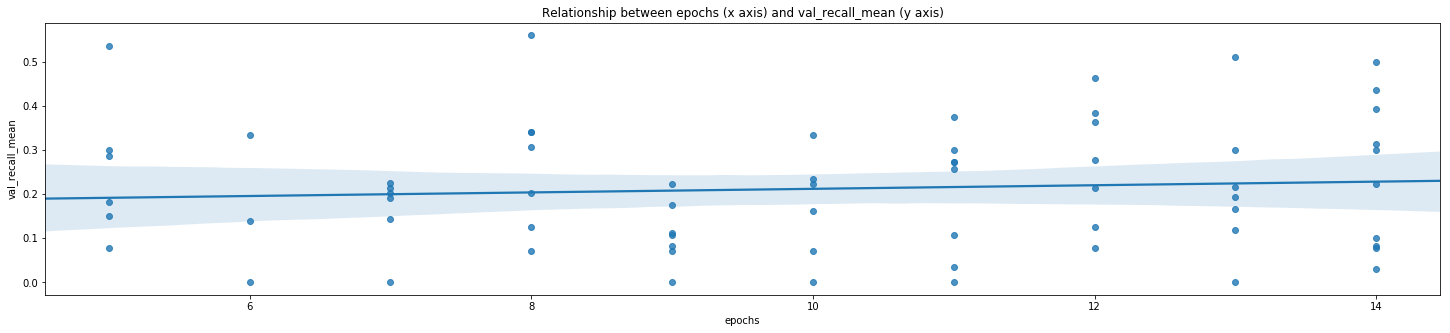

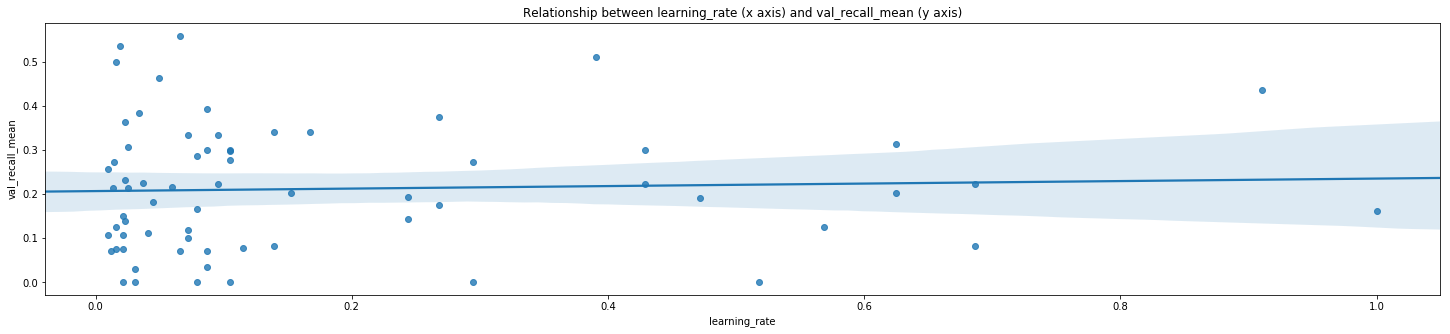

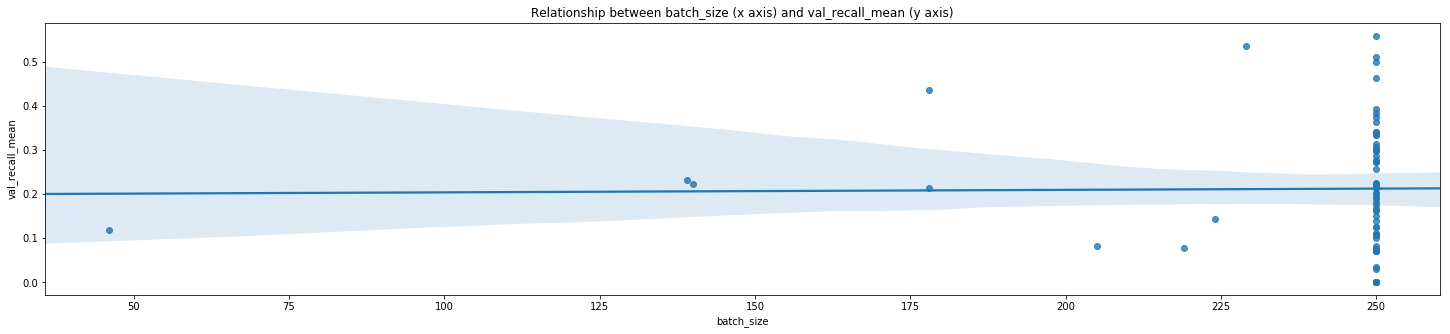

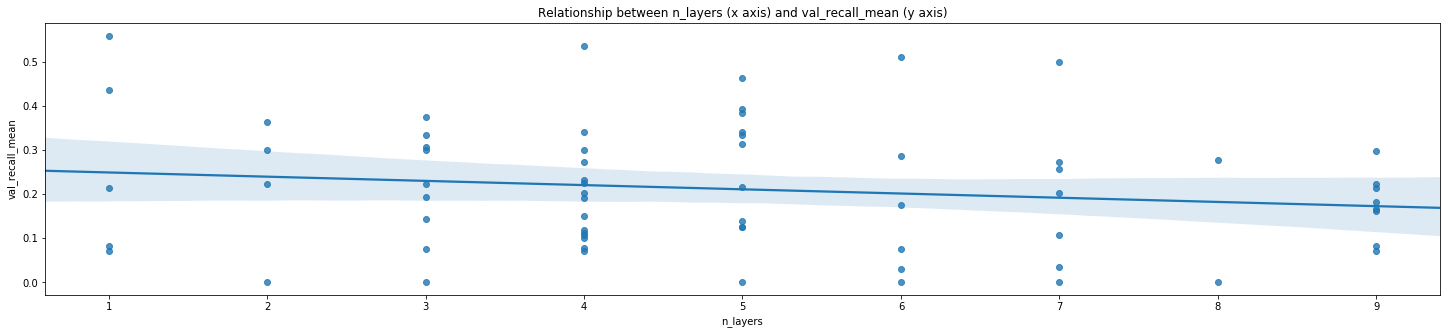

In [16]:
parameters = ['epochs', 'learning_rate', 'batch_size', 'n_layers']
metric = 'val_recall_mean'
for parameter in parameters:
    fig, ax = plt.subplots(figsize=(25, 5))
    sns.regplot(experiments[parameter], experiments[metric])
    ax.set_title(f'Relationship between {parameter} (x axis) and {metric} (y axis)')

In [18]:
experiments[metrics]

,loss_mean,precision_mean,recall_mean,val_loss_mean,val_precision_mean,val_recall_mean
0,0.428970,0.352427,0.182401,1.899970,0.006972,0.162500
1,0.322737,0.455090,0.335123,0.394974,0.016127,0.272727
2,0.468587,0.408186,0.348568,0.531541,0.014765,0.125000
3,0.278405,0.348114,0.136098,1.688713,0.014580,0.166667
4,0.343885,0.392587,0.212006,0.500393,0.020440,0.203125
5,0.307135,0.394940,0.193759,3.104434,0.014097,0.272727
6,1.068983,0.341264,0.396857,0.713857,0.012821,0.138889
7,0.326867,0.365921,0.166542,0.434836,0.042476,0.276736
8,0.680874,0.393504,0.391072,1.376563,0.022282,0.341667
9,0.854159,0.367182,0.371476,0.495360,0.023243,0.190476
